## Russia Ukrain War Sentiment Analysis

Analysing the dataset of the ukraine and russia war, dataset is publicly available on kaggle.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

data = pd.read_csv("filename.csv")
print(data.head())

                    id      conversation_id               created_at  \
0  1547761941023584256  1547761582595182595  2022-07-15 01:56:17 UTC   
1  1547761928298106880  1547761928298106880  2022-07-15 01:56:14 UTC   
2  1547761927467573249  1463518852390793222  2022-07-15 01:56:14 UTC   
3  1547761924989145088  1547761924989145088  2022-07-15 01:56:13 UTC   
4  1547761919813070856  1547726631439020032  2022-07-15 01:56:12 UTC   

         date      time  timezone              user_id         username  \
0  2022-07-15  01:56:17         0             34492262      djfunkygrrl   
1  2022-07-15  01:56:14         0             29246710  ivorypearlmusic   
2  2022-07-15  01:56:14         0  1540022669013356547    koreancapital   
3  2022-07-15  01:56:13         0           2393592282         rusembau   
4  2022-07-15  01:56:12         0  1382819948662247425        yessslulu   

                                                name place  ... geo source  \
0                                     

In [2]:
# checking column name of the data set

print(data.columns)

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')


In [5]:
#a sneek peek into the follwing column and checking column for non null values

data = data[["username", "tweet", "language"]]
data.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

In [6]:
# count number of tweet posted in each language

data["language"].value_counts()

en     8619
pt      536
it      199
qme     142
in       69
und      64
es       56
ru       35
ja       35
ca       33
fr       26
qht      20
pl       19
uk       18
fi       14
th       12
qam      11
ar       10
el        9
de        9
tl        8
zh        7
nl        6
tr        5
is        5
hi        5
cs        4
vi        4
no        3
ro        3
ko        3
ur        3
ht        2
ta        1
et        1
lv        1
lt        1
da        1
bn        1
cy        1
sl        1
Name: language, dtype: int64

In [10]:
#a regex function to remove links, url, symbol and punctuation s

nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\x\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


AttributeError: 'set' object has no attribute 'words'

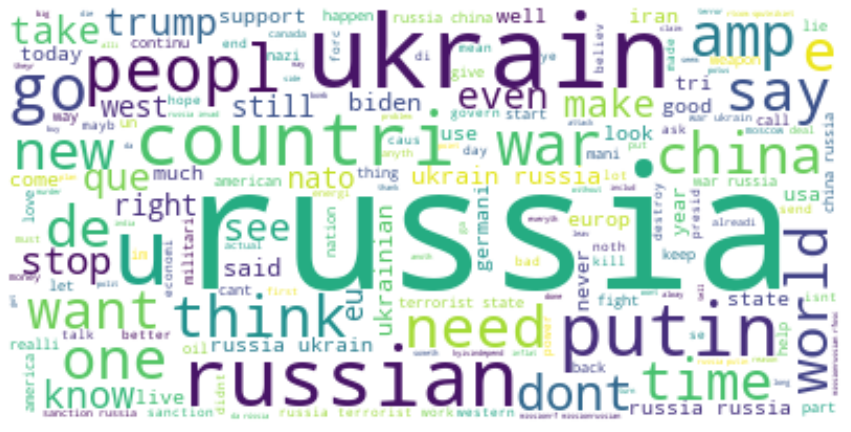

In [9]:
text = " ".join(i for i in data.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Adding three more columns called "Positive", "Negative", "Neutral" to calculate the Sentiment Analysis

In [11]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["tweet"]]
data = data[["tweet", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\x\AppData\Roaming\nltk_data...


                                               tweet  Positive  Negative  \
0         mikhail fradkov famili properti worth  ...     0.106     0.000   
1  kremlinrussia sign discrimin titfortat order l...     0.000     0.205   
2   ronnyjacksontx wor communist china russia day...     0.000     0.104   
3  🇷🇺statement joint coordin headquart humanitari...     0.000     0.000   
4  igordsda amanha eh em portug estudando camo ma...     0.000     0.000   

   Neutral  
0    0.894  
1    0.795  
2    0.896  
3    1.000  
4    1.000  


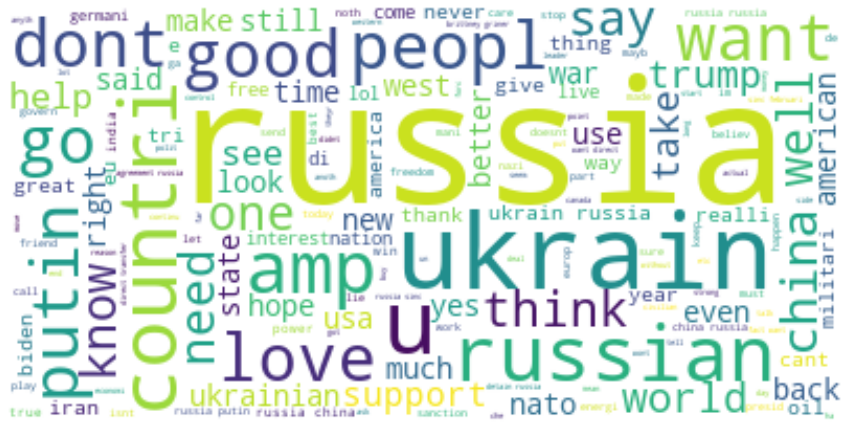

In [12]:
# most common words with positive comments

positive =' '.join([i for i in data['tweet'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

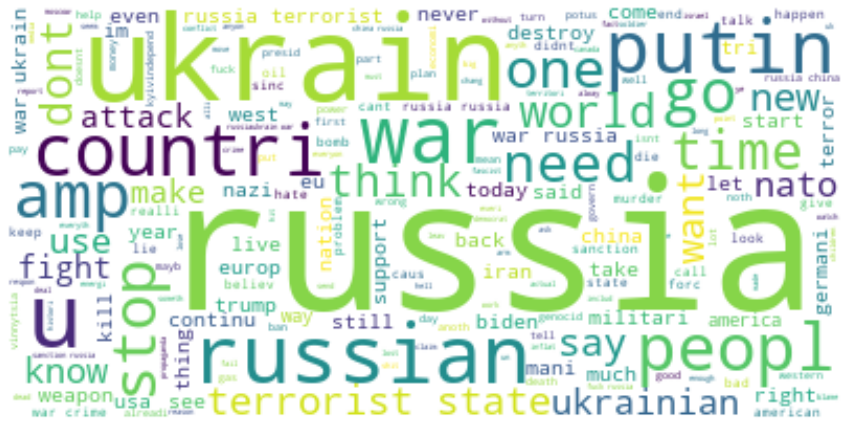

In [13]:
# most common words with negativate sentiment

negative =' '.join([i for i in data['tweet'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Summary

An analysis of the tweets of people regarding what each individual thinks or their opinion about the russian-ukraine war.